# Caitlin Rush ~ 991534296

**Project number**: 6

**Dataset**: Wine Quality Dataset (white wine data)

**Task**: Regression

**Target**: alcohol

In [27]:
!wget -q https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv

In [28]:
import pandas as pd
df_wine = pd.read_csv('/content/winequality-white.csv',sep=';')
df_wine

fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0               7.0              0.27         0.36  ...       0.45      8.8        6
1               6.3              0.30         0.34  ...       0.49      9.5        6
2               8.1              0.28         0.40  ...       0.44     10.1        6
3               7.2              0.23         0.32  ...       0.40      9.9        6
4               7.2              0.23         0.32  ...       0.40      9.9        6
...             ...               ...          ...  ...        ...      ...      ...
4893            6.2              0.21         0.29  ...       0.50     11.2        6
4894            6.6              0.32         0.36  ...       0.46      9.6        5
4895            6.5              0.24         0.19  ...       0.46      9.4        6
4896            5.5              0.29         0.30  ...       0.38     12.8        7
4897            6.0              0.21         0.38  ...       0.32     11.8        6

[4898 rows x 12 columns]

In [29]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [30]:
df_wine.shape

(4898, 12)

In [31]:
data = df_wine.sample(frac=0.9, random_state=786)
data_unseen = df_wine.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data for Predictions: ' + str(data_unseen.shape))

Data for Modeling: (4408, 12)
Unseen Data for Predictions: (490, 12)


In [32]:
from pycaret.regression import * 
exp_reg101 = setup(data = data, target = 'alcohol', session_id=123)

Description             Value
0                               session_id               123
1                                   Target           alcohol
2                            Original Data        (4408, 12)
3                           Missing Values             False
4                         Numeric Features                10
5                     Categorical Features                 1
6                         Ordinal Features             False
7                High Cardinality Features             False
8                  High Cardinality Method              None
9                    Transformed Train Set        (3085, 17)
10                    Transformed Test Set        (1323, 17)
11                      Shuffle Train-Test              True
12                     Stratify Train-Test             False
13                          Fold Generator             KFold
14                             Fold Number                10
15                                CPU Jobs                -1
16                                 Use GPU             False
17                          Log Experiment             False
18                         Experiment Name  reg-default-name
19                                     USI              6e75
20                         Imputation Type            simple
21          Iterative Imputation Iteration              None
22                         Numeric Imputer              mean
23      Iterative Imputation Numeric Model              None
24                     Categorical Imputer          constant
25  Iterative Imputation Categorical Model              None
26           Unknown Categoricals Handling    least_frequent
27                               Normalize             False
28                        Normalize Method              None
29                          Transformation             False
30                   Transformation Method              None
31                                     PCA             False
32                              PCA Method              None
33                          PCA Components              None
34                     Ignore Low Variance             False
35                     Combine Rare Levels             False
36                    Rare Level Threshold              None
37                         Numeric Binning             False
38                         Remove Outliers             False
39                      Outliers Threshold              None
40                Remove Multicollinearity             False
41             Multicollinearity Threshold              None
42             Remove Perfect Collinearity              True
43                              Clustering             False
44                    Clustering Iteration              None
45                     Polynomial Features             False
46                       Polynomial Degree              None
47                    Trignometry Features             False
48                    Polynomial Threshold              None
49                          Group Features             False
50                       Feature Selection             False
51                Feature Selection Method           classic
52            Features Selection Threshold              None
53                     Feature Interaction             False
54                           Feature Ratio             False
55                   Interaction Threshold              None
56                        Transform Target             False
57                 Transform Target Method           box-cox

In [34]:
best = compare_models(exclude = ['ransac'])

Model     MAE     MSE    RMSE      R2  \
lightgbm  Light Gradient Boosting Machine  0.2491  0.1151  0.3378  0.9231   
rf                Random Forest Regressor  0.2563  0.1358  0.3673  0.9091   
et                  Extra Trees Regressor  0.2421  0.1376  0.3694  0.9079   
lr                      Linear Regression  0.2827  0.1390  0.3710  0.9070   
br                         Bayesian Ridge  0.2827  0.1390  0.3710  0.9070   
lar                Least Angle Regression  0.2908  0.1506  0.3846  0.8998   
gbr           Gradient Boosting Regressor  0.3052  0.1604  0.3992  0.8927   
dt                Decision Tree Regressor  0.3196  0.2571  0.5056  0.8278   
ada                    AdaBoost Regressor  0.4714  0.3272  0.5715  0.7809   
omp           Orthogonal Matching Pursuit  0.5792  0.5334  0.7295  0.6430   
ridge                    Ridge Regression  0.6914  0.7512  0.8665  0.4971   
huber                     Huber Regressor  0.7730  0.9495  0.9741  0.3642   
en                            Elastic Net  0.8304  1.0725  1.0352  0.2825   
knn                 K Neighbors Regressor  0.7965  1.0787  1.0381  0.2778   
lasso                    Lasso Regression  0.8471  1.1057  1.0510  0.2604   
llar         Lasso Least Angle Regression  1.0264  1.4983  1.2236 -0.0020   
dummy                     Dummy Regressor  1.0264  1.4983  1.2236 -0.0020   
par          Passive Aggressive Regressor  1.0494  1.8050  1.2884 -0.2130   

           RMSLE    MAPE  TT (Sec)  
lightgbm  0.0291  0.0237     0.109  
rf        0.0315  0.0242     1.563  
et        0.0317  0.0229     0.955  
lr        0.0332  0.0272     0.017  
br        0.0332  0.0272     0.017  
lar       0.0347  0.0281     0.019  
gbr       0.0346  0.0292     0.410  
dt        0.0435  0.0302     0.037  
ada       0.0503  0.0460     0.260  
omp       0.0634  0.0553     0.016  
ridge     0.0744  0.0658     0.015  
huber     0.0826  0.0726     0.091  
en        0.0879  0.0784     0.017  
knn       0.0881  0.0751     0.066  
lasso     0.0894  0.0801     0.018  
llar      0.1048  0.0977     0.017  
dummy     0.1048  0.0977     0.011  
par       0.1107  0.0992     0.027

In [35]:
models()

Name  ...  Turbo
ID                                           ...       
lr                        Linear Regression  ...   True
lasso                      Lasso Regression  ...   True
ridge                      Ridge Regression  ...   True
en                              Elastic Net  ...   True
lar                  Least Angle Regression  ...   True
llar           Lasso Least Angle Regression  ...   True
omp             Orthogonal Matching Pursuit  ...   True
br                           Bayesian Ridge  ...   True
ard       Automatic Relevance Determination  ...  False
par            Passive Aggressive Regressor  ...   True
ransac              Random Sample Consensus  ...  False
tr                       TheilSen Regressor  ...  False
huber                       Huber Regressor  ...   True
kr                             Kernel Ridge  ...  False
svm               Support Vector Regression  ...  False
knn                   K Neighbors Regressor  ...   True
dt                  Decision Tree Regressor  ...   True
rf                  Random Forest Regressor  ...   True
et                    Extra Trees Regressor  ...   True
ada                      AdaBoost Regressor  ...   True
gbr             Gradient Boosting Regressor  ...   True
mlp                           MLP Regressor  ...  False
lightgbm    Light Gradient Boosting Machine  ...   True
dummy                       Dummy Regressor  ...   True

[24 rows x 3 columns]

In [36]:
ada = create_model('ada')

MAE     MSE    RMSE      R2   RMSLE    MAPE
0     0.4668  0.3327  0.5768  0.7694  0.0505  0.0450
1     0.4754  0.3289  0.5735  0.7744  0.0502  0.0460
2     0.4608  0.3143  0.5606  0.8001  0.0492  0.0449
3     0.4603  0.3195  0.5652  0.7735  0.0501  0.0452
4     0.4977  0.3596  0.5996  0.7843  0.0525  0.0485
5     0.4938  0.3650  0.6041  0.7536  0.0535  0.0485
6     0.4576  0.3068  0.5539  0.7773  0.0481  0.0442
7     0.4945  0.3581  0.5984  0.7660  0.0539  0.0495
8     0.4514  0.2991  0.5469  0.7946  0.0476  0.0435
9     0.4553  0.2877  0.5363  0.8154  0.0471  0.0444
Mean  0.4714  0.3272  0.5715  0.7809  0.0503  0.0460
SD    0.0169  0.0254  0.0222  0.0172  0.0023  0.0020

In [37]:
print(ada)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=123)


In [38]:
lightgbm = create_model('lightgbm')

MAE     MSE    RMSE      R2   RMSLE    MAPE
0     0.2695  0.1362  0.3690  0.9056  0.0318  0.0255
1     0.2508  0.1119  0.3345  0.9233  0.0286  0.0237
2     0.2498  0.1151  0.3393  0.9268  0.0295  0.0239
3     0.2743  0.1295  0.3598  0.9082  0.0311  0.0262
4     0.2598  0.1627  0.4034  0.9024  0.0340  0.0244
5     0.2660  0.1242  0.3524  0.9162  0.0306  0.0254
6     0.2258  0.0892  0.2987  0.9352  0.0260  0.0214
7     0.2310  0.0952  0.3085  0.9378  0.0271  0.0222
8     0.2288  0.0959  0.3096  0.9342  0.0265  0.0216
9     0.2354  0.0917  0.3027  0.9412  0.0258  0.0223
Mean  0.2491  0.1151  0.3378  0.9231  0.0291  0.0237
SD    0.0171  0.0223  0.0322  0.0135  0.0026  0.0016

In [39]:
dt = create_model('dt')

MAE     MSE    RMSE      R2   RMSLE    MAPE
0     0.3370  0.2719  0.5214  0.8116  0.0453  0.0315
1     0.3170  0.2544  0.5044  0.8255  0.0430  0.0298
2     0.3269  0.2566  0.5065  0.8368  0.0440  0.0312
3     0.3481  0.2926  0.5410  0.7925  0.0459  0.0326
4     0.3259  0.3147  0.5610  0.8112  0.0478  0.0309
5     0.3608  0.2971  0.5451  0.7994  0.0469  0.0343
6     0.3001  0.2109  0.4593  0.8469  0.0397  0.0283
7     0.3036  0.2548  0.5048  0.8335  0.0444  0.0292
8     0.3162  0.2373  0.4871  0.8370  0.0416  0.0296
9     0.2601  0.1809  0.4253  0.8839  0.0364  0.0245
Mean  0.3196  0.2571  0.5056  0.8278  0.0435  0.0302
SD    0.0267  0.0384  0.0388  0.0251  0.0033  0.0025

In [40]:
tuned_ada = tune_model(ada)

MAE     MSE    RMSE      R2   RMSLE    MAPE
0     0.4573  0.3162  0.5623  0.7809  0.0493  0.0442
1     0.4664  0.3218  0.5673  0.7792  0.0497  0.0452
2     0.4522  0.3040  0.5514  0.8066  0.0488  0.0443
3     0.4509  0.3038  0.5512  0.7846  0.0488  0.0443
4     0.4683  0.3200  0.5657  0.8081  0.0494  0.0455
5     0.5038  0.3720  0.6099  0.7489  0.0541  0.0496
6     0.4559  0.2999  0.5477  0.7823  0.0479  0.0444
7     0.4775  0.3270  0.5718  0.7863  0.0514  0.0477
8     0.4319  0.2793  0.5285  0.8082  0.0459  0.0417
9     0.4552  0.2924  0.5407  0.8123  0.0480  0.0449
Mean  0.4619  0.3136  0.5596  0.7897  0.0493  0.0452
SD    0.0181  0.0239  0.0209  0.0185  0.0021  0.0020

In [41]:
print(tuned_ada)

AdaBoostRegressor(base_estimator=None, learning_rate=0.4, loss='square',
                  n_estimators=130, random_state=123)


In [42]:
import numpy as np
lgbm_params = {'num_leaves': np.arange(10,200,10),
                        'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
                        'learning_rate': np.arange(0.1,1,0.1)
                        }

In [43]:
tuned_lightgbm = tune_model(lightgbm, custom_grid = lgbm_params)

MAE     MSE    RMSE      R2   RMSLE    MAPE
0     0.2526  0.1348  0.3671  0.9066  0.0315  0.0237
1     0.2257  0.1008  0.3175  0.9309  0.0271  0.0212
2     0.2278  0.1068  0.3267  0.9321  0.0284  0.0217
3     0.2614  0.1254  0.3541  0.9111  0.0304  0.0248
4     0.2489  0.1578  0.3973  0.9053  0.0333  0.0232
5     0.2436  0.1165  0.3413  0.9214  0.0294  0.0231
6     0.2051  0.0825  0.2873  0.9401  0.0247  0.0193
7     0.1976  0.0884  0.2974  0.9422  0.0259  0.0189
8     0.2177  0.0970  0.3114  0.9334  0.0266  0.0206
9     0.2076  0.0830  0.2880  0.9468  0.0244  0.0196
Mean  0.2288  0.1093  0.3288  0.9270  0.0282  0.0216
SD    0.0209  0.0232  0.0343  0.0143  0.0028  0.0019

In [44]:
print(tuned_lightgbm)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=60,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=120, objective=None,
              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [45]:
tuned_dt = tune_model(dt)

MAE     MSE    RMSE      R2   RMSLE    MAPE
0     0.3813  0.2716  0.5212  0.8117  0.0451  0.0360
1     0.3673  0.2464  0.4964  0.8310  0.0424  0.0348
2     0.3612  0.2471  0.4971  0.8428  0.0430  0.0346
3     0.3720  0.2626  0.5124  0.8138  0.0436  0.0350
4     0.3789  0.2956  0.5436  0.8227  0.0466  0.0362
5     0.3841  0.2727  0.5222  0.8160  0.0449  0.0364
6     0.3231  0.2032  0.4507  0.8525  0.0392  0.0305
7     0.3324  0.2307  0.4803  0.8493  0.0424  0.0321
8     0.3677  0.2549  0.5049  0.8249  0.0432  0.0347
9     0.3053  0.1862  0.4315  0.8805  0.0367  0.0287
Mean  0.3573  0.2471  0.4960  0.8345  0.0427  0.0339
SD    0.0259  0.0313  0.0322  0.0206  0.0028  0.0025

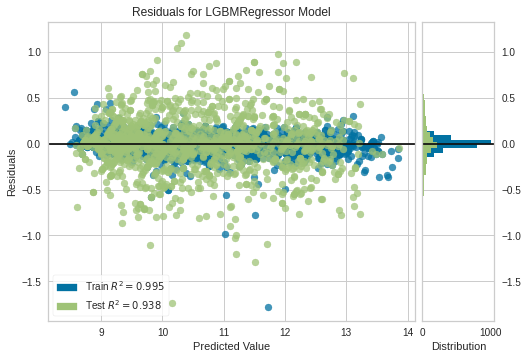

In [46]:
plot_model(tuned_lightgbm)

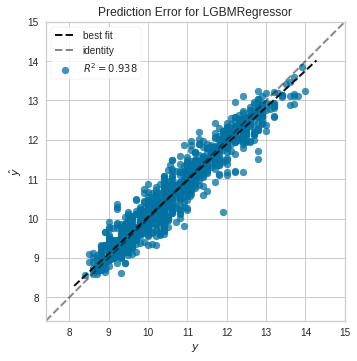

In [47]:
plot_model(tuned_lightgbm, plot = 'error')

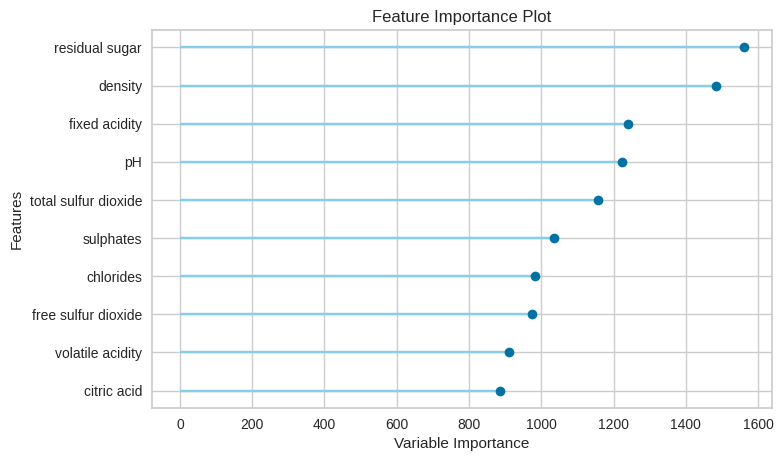

In [48]:
plot_model(tuned_lightgbm, plot = 'feature')

In [49]:
evaluate_model(tuned_lightgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [50]:
predict_model(tuned_lightgbm)

Model     MAE     MSE  ...     R2   RMSLE    MAPE
0  Light Gradient Boosting Machine  0.2128  0.0925  ...  0.938  0.0262  0.0202

[1 rows x 7 columns]

fixed acidity  volatile acidity  ...  alcohol      Label
0               6.4              0.34  ...      9.8   9.637589
1               3.8              0.31  ...     12.4  12.210432
2               6.4              0.31  ...     10.4  11.083844
3               6.4              0.31  ...     11.0  11.420731
4               7.8              0.16  ...     12.5  12.591517
...             ...               ...  ...      ...        ...
1318            8.2              0.27  ...      9.5   9.720044
1319            7.4              0.25  ...     10.8  11.183049
1320            6.7              0.26  ...     10.4   9.989971
1321            6.7              0.35  ...     12.9  12.596066
1322            6.5              0.22  ...     11.5  11.682488

[1323 rows x 19 columns]

In [51]:
final_lightgbm = finalize_model(tuned_lightgbm)

In [52]:
print(final_lightgbm)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=60,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=120, objective=None,
              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [53]:
predict_model(final_lightgbm)

Model     MAE     MSE  ...      R2   RMSLE    MAPE
0  Light Gradient Boosting Machine  0.0618  0.0079  ...  0.9947  0.0076  0.0059

[1 rows x 7 columns]

fixed acidity  volatile acidity  ...  alcohol      Label
0               6.4              0.34  ...      9.8   9.781991
1               3.8              0.31  ...     12.4  12.396122
2               6.4              0.31  ...     10.4  10.432518
3               6.4              0.31  ...     11.0  11.068705
4               7.8              0.16  ...     12.5  12.549728
...             ...               ...  ...      ...        ...
1318            8.2              0.27  ...      9.5   9.557800
1319            7.4              0.25  ...     10.8  10.887920
1320            6.7              0.26  ...     10.4  10.388920
1321            6.7              0.35  ...     12.9  12.861381
1322            6.5              0.22  ...     11.5  11.484409

[1323 rows x 19 columns]

In [54]:
unseen_predictions = predict_model(final_lightgbm, data=data_unseen)
unseen_predictions.head()

fixed acidity  volatile acidity  citric acid  ...  alcohol  quality      Label
0            8.1              0.28         0.40  ...     10.1        6  10.172907
1            7.0              0.27         0.36  ...      8.8        6   9.031585
2            8.6              0.23         0.40  ...      9.7        5  10.273084
3            6.6              0.16         0.40  ...     12.4        7  11.719209
4            7.4              0.34         0.42  ...     11.3        6  11.078610

[5 rows x 13 columns]

In [55]:
from pycaret.utils import check_metric
check_metric(unseen_predictions.alcohol, unseen_predictions.Label, 'R2')

0.9465

In [56]:
save_model(final_lightgbm, 'Final LightGBM Model 7Dec2021')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='alcohol',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy...
                  LGBMRegressor(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importance_type='split',
                                learning_rate=0.1, max_depth=60,
                                min_child_samples=20, min_child_weight=0.001,
                  

In [57]:
saved_final_lightgbm = load_model('Final LightGBM Model 7Dec2021')

Transformation Pipeline and Model Successfully Loaded


In [58]:
new_prediction = predict_model(saved_final_lightgbm, data=data_unseen)

In [59]:
new_prediction.head()

fixed acidity  volatile acidity  citric acid  ...  alcohol  quality      Label
0            8.1              0.28         0.40  ...     10.1        6  10.172907
1            7.0              0.27         0.36  ...      8.8        6   9.031585
2            8.6              0.23         0.40  ...      9.7        5  10.273084
3            6.6              0.16         0.40  ...     12.4        7  11.719209
4            7.4              0.34         0.42  ...     11.3        6  11.078610

[5 rows x 13 columns]

In [61]:
from pycaret.utils import check_metric
check_metric(new_prediction.alcohol, new_prediction.Label, 'R2')

0.9465